In [26]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


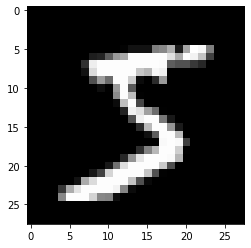

In [28]:
x_train[0]
import matplotlib.pyplot as plt
# plt.axis('off')
plt.imshow(x_train[0], cmap='gray')

In [29]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

layers = [
    Dense(128, activation='relu', input_dim=784),
    Dense(10, activation='softmax')
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [31]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [32]:
x_train_norm = x_train.reshape(len(x_train), -1) / 255.0
x_test_norm = x_test.reshape(len(x_test), -1) / 255.0

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
x_train_norm.shape

(60000, 784)

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('mlp.h5', save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(x_train_norm, y_train_cat, batch_size=32, epochs=50, verbose=2, validation_split=0.1, callbacks=callbacks)

Epoch 1/50
1688/1688 - 5s - loss: 0.2740 - accuracy: 0.9213 - val_loss: 0.1272 - val_accuracy: 0.9630 - 5s/epoch - 3ms/step
Epoch 2/50
1688/1688 - 6s - loss: 0.1236 - accuracy: 0.9631 - val_loss: 0.0994 - val_accuracy: 0.9698 - 6s/epoch - 3ms/step
Epoch 3/50
1688/1688 - 5s - loss: 0.0845 - accuracy: 0.9742 - val_loss: 0.0942 - val_accuracy: 0.9713 - 5s/epoch - 3ms/step
Epoch 4/50
1688/1688 - 5s - loss: 0.0638 - accuracy: 0.9805 - val_loss: 0.0761 - val_accuracy: 0.9772 - 5s/epoch - 3ms/step
Epoch 5/50
1688/1688 - 4s - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0757 - val_accuracy: 0.9777 - 4s/epoch - 3ms/step
Epoch 6/50
1688/1688 - 4s - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0791 - val_accuracy: 0.9778 - 4s/epoch - 3ms/step
Epoch 7/50
1688/1688 - 4s - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0823 - val_accuracy: 0.9777 - 4s/epoch - 3ms/step
Epoch 8/50
1688/1688 - 5s - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.0784 - val_accuracy: 0.9785 - 5s/epoch - 3ms/step
Epoch 9/

In [ ]:
model.history.history

In [37]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9791


[0.07504689693450928, 0.9790999889373779]

In [38]:
model2 = load_model('mlp.h5')
model2.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9791


[0.07504689693450928, 0.9790999889373779]

In [42]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [45]:
import numpy as np

x_test[pre != y_test].shape

(209, 28, 28)

true: 9
pred: 5


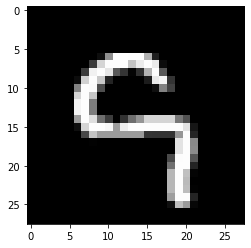

In [48]:
print('true:', y_test[pre != y_test][0])
print('pred:', pre[pre != y_test][0])
plt.imshow(x_test[pre != y_test][0], cmap='gray')

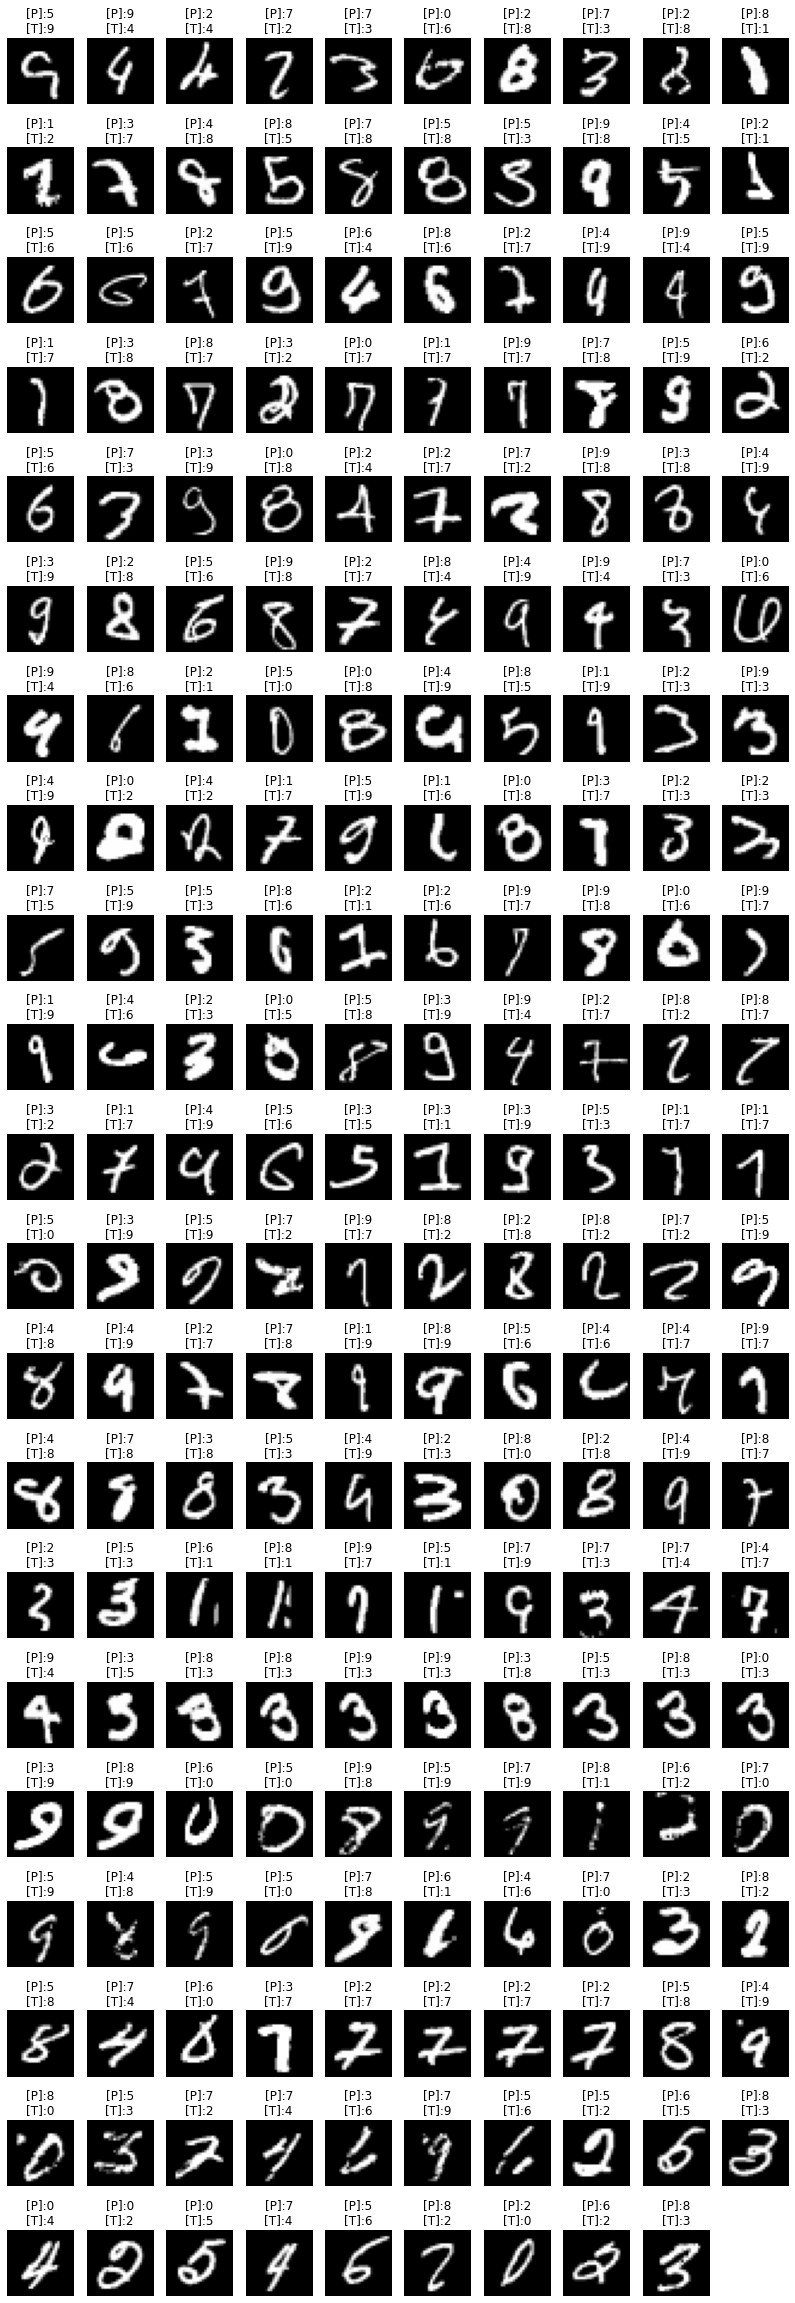

In [49]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_img = x_test[idx]
false_true = y_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[T]:{}".format(false_pre[i], false_true[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i], cmap="gray")